In [146]:
#Importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy import stats
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [147]:
#Reading the files
df = pd.read_csv("placement.csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [148]:
#Train Test Split the Data
x_train,x_test,y_train,y_test = train_test_split(df.drop("package",axis=1),df["package"])

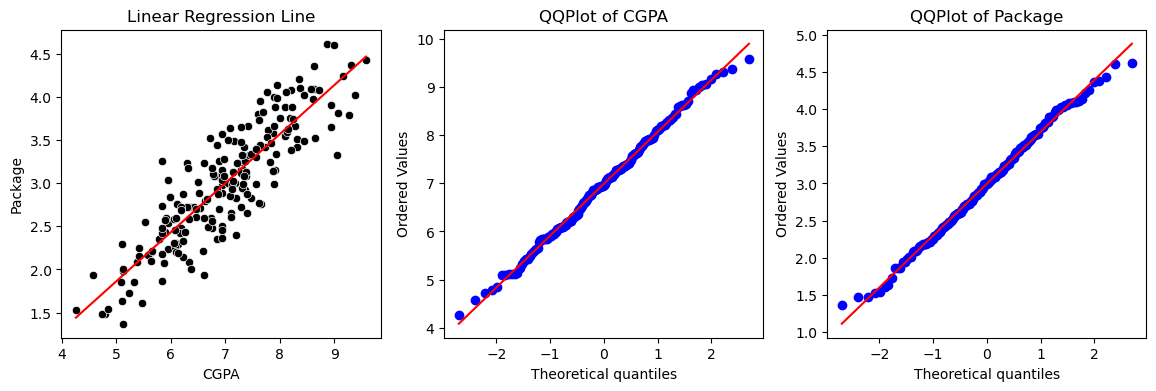

In [149]:
#Visualising the Linear Regression Line
plt.figure(figsize = (14,4))
plt.subplot(131)
sns.scatterplot(x = df["cgpa"],y = df["package"],color = "black")
x_vals = sorted(df["cgpa"])
y_vals = [calc(i) for i in x_vals]
plt.plot(x_vals,y_vals,color = "red")
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.title("Linear Regression Line")
plt.subplot(132)
stats.probplot(df["cgpa"],dist = "norm",plot = plt)
plt.title("QQPlot of CGPA")
plt.subplot(133)
stats.probplot(df["package"],dist = "norm",plot = plt)
plt.title("QQPlot of Package")
plt.show()

In [150]:
#Linear Regression Made from Scratch
def calc(a):
    a = float(a)
    def linear_reg():
        x_mean = df["cgpa"].mean()
        y_mean = df["package"].mean()
        y = df["package"]
        x = df["cgpa"]
        lower = 0
        upper = 0
        for i in range(len(df)):
            upper += ((x[i]-x_mean)*(y[i]-y_mean))
            lower+= pow((x[i]-x_mean),2)
        slope = upper/lower
        intercept = y_mean-slope*x_mean
        return slope,intercept
    slope,intercept = linear_reg()
    y_mean = df["package"].mean()
    y_pred = slope*a+intercept
    return y_pred

In [151]:
#Custom input
input_val = input("Enter your CGPA: ")
calc(input_val)

Enter your CGPA:  9.15


4.22608240110711

In [152]:
#Cell used for displaying the accuracy of the made from scratch Linear Regression Model
rand = [random.randint(1,100) for i in range(1,20)]
tester = list(df["cgpa"].iloc[rand])
result_true = list(df["package"].iloc[rand])
y_pred = []
for i in tester:
    z = calc(i)
    y_pred.append(round(z,2))
mae = mean_absolute_error(result_true, y_pred)
mse = mean_squared_error(result_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(result_true, y_pred)
print(f"Mean Absolute Error:{round(mae,2)}")
print(f"Mean Square Error:{round(mse,2)}")
print(f"Root Mean Square Error:{round(rmse,2)}")
print(f"R2 Score:{round(r2,2)}")

Mean Absolute Error:0.26
Mean Square Error:0.12
Root Mean Square Error:0.35
R2 Score:0.77
